<a href="https://colab.research.google.com/github/stkchan/projects/blob/main/MiNIBADS_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from mlxtend.frequent_patterns import apriori, association_rules

#Import File

In [ ]:
path = "online_customers.csv"
df = pd.read_csv(path, encoding = 'unicode_escape')

In [ ]:
#Shape of DataFrame
df.shape

(146982, 9)

In [ ]:
# Preview top 5 rows
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
127765,547248,21931,JUMBO STORAGE BAG SUKI,1,20-Mar-17,4.13,NaN,United Kingdom,NaN
2806,536592,22746,POPPY'S PLAYHOUSE LIVINGROOM,2,29-Nov-16,4.21,NaN,United Kingdom,NaN
74831,542530,22303,COFFEE MUG APPLES DESIGN,6,26-Jan-17,2.55,15365.0,United Kingdom,NaN
101474,544920,21155,RED RETROSPOT PEG BAG,18,22-Feb-17,2.55,13081.0,United Kingdom,NaN
62144,541497,21509,COWBOYS AND INDIANS BIRTHDAY CARD,2,16-Jan-17,0.83,NaN,United Kingdom,NaN
96468,544569,22127,PARTY CONES CARNIVAL ASSORTED,24,19-Feb-17,1.25,16980.0,United Kingdom,NaN
64301,541596,20886,BOX OF 9 PEBBLE CANDLES,6,17-Jan-17,1.95,17602.0,United Kingdom,NaN
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,3-Dec-16,0.00,12647.0,Germany,NaN
57577,541214,21313,GLASS HEART T-LIGHT HOLDER,12,12-Jan-17,0.85,15570.0,United Kingdom,NaN
32085,539041,20725,LUNCH BAG RED RETROSPOT,4,13-Dec-16,1.65,15456.0,United Kingdom,NaN


In [ ]:
#DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146982 entries, 0 to 146981
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    146982 non-null  object 
 1   StockCode    146982 non-null  object 
 2   Description  146467 non-null  object 
 3   Quantity     146982 non-null  int64  
 4   InvoiceDate  146982 non-null  object 
 5   UnitPrice    146982 non-null  float64
 6   CustomerID   101039 non-null  float64
 7   Country      146982 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 10.1+ MB


In [ ]:
#Preview basic statistics
df.describe()

,Quantity,UnitPrice,CustomerID,Unnamed: 8
count,146982.000000,146982.000000,101039.000000,0.0
mean,9.063103,5.195809,15294.105444,NaN
std,279.120472,103.696797,1740.460738,NaN
min,-74215.000000,0.000000,12346.000000,NaN
25%,1.000000,1.250000,13842.000000,NaN
50%,3.000000,2.460000,15197.000000,NaN
75%,10.000000,4.210000,16893.000000,NaN
max,74215.000000,16888.020000,18283.000000,NaN


In [ ]:
#Unique values
df.nunique()

InvoiceNo      7172
StockCode      3286
Description    3209
Quantity        379
InvoiceDate      99
UnitPrice       739
CustomerID     2236
Country          33
Unnamed: 8        0
dtype: int64

In [ ]:
#Sum null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       515
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID      45943
Country             0
Unnamed: 8     146982
dtype: int64

## Clean Data

In [ ]:
#Drop "Unnamed" column
df_cleaned = df.drop("Unnamed: 8", axis = 1)
df_cleaned = df_cleaned.dropna()

In [ ]:
#Filter Quantity >= 0
df_cleaned = df_cleaned[df_cleaned["Quantity"] >= 0]

In [ ]:
# 143985 rows removed
df_cleaned.shape

(98477, 8)

In [ ]:
#Change type of "CustomerID"  and "InvoiceDate"
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype(pd.Int64Dtype())
df_cleaned["CustomerID"] = df_cleaned["CustomerID"].astype("object")
df_cleaned["InvoiceDate"] = pd.to_datetime(df_cleaned["InvoiceDate"])

In [ ]:
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#Filter rows country = "UK"
df_uk = df_cleaned[df_cleaned["Country"] == "United Kingdom"]

In [ ]:
print(f'Total Items : {len(df_uk["Description"].unique())}')
print('\n')
print(df_uk["Description"].unique())

Total Items : 2900


['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'BLACK PHOTO ALBUM '
 'TUMBLER BAROQUE' 'GOLDIE LOOKING MIRROR']


In [ ]:
# ลูกค้าซื้ออะไรไปบ้าง
df_bas_uk = df_uk.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")
df_bas_uk

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 PINK HEN+CHICKS IN BASKET,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAL COOKIE CUTTERS SET,...,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP I LOVE LONDON,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN","WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
# encode binary = 1 คือซื้อ 2 คือไม่ซื้อ
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

df_bas_encode = df_bas_uk.applymap(encode_units)
df_bas_encode

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 PINK HEN+CHICKS IN BASKET,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAL COOKIE CUTTERS SET,...,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP I LOVE LONDON,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN","WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
549021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
549022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,

In [ ]:
#Filter transaction > 1 item
df_bas_filter = df_bas_encode[ (df_bas_encode > 0).sum(axis = 1) >= 2]
df_bas_filter

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 PINK HEN+CHICKS IN BASKET,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,3 TIER SWEETHEART GARDEN SHELF,3 TRADITIONAL COOKIE CUTTERS SET,...,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN PEARS,WRAP GREEN RUSSIAN FOLKART,WRAP I LOVE LONDON,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN","WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
549020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
549021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,

In [ ]:
#กำหนด min_support 0.02 (สินค้าที่ซื้อบ่อย มากกว่า 2 %)
#WHITE HANGING HEART T-LIGHT HOLDER เป็นสินค้าที่๋ซิ้อบ่อยที่สุด เป็น 1.5 % จาก transaction
frequent_itemsets = apriori(df_bas_filter, min_support = 0.02,
                            use_colnames = True).sort_values(by = "support", ascending = False).reset_index(drop = True)
 
frequent_itemsets["length"] = frequent_itemsets["itemsets"].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.159270,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.116864,(REGENCY CAKESTAND 3 TIER),1
2,0.102071,(SET OF 3 CAKE TINS PANTRY DESIGN ),1
3,0.083580,(JUMBO BAG RED RETROSPOT),1
4,0.081607,(ASSORTED COLOUR BIRD ORNAMENT),1
...,...,...,...
308,0.020217,(PAINTED METAL PEARS ASSORTED),1
309,0.020217,(RED RETROSPOT WRAP ),1
310,0.020217,(RED RETROSPOT SMALL MILK JUG),1
311,0.020217,(POPPY'S PLAYHOUSE LIVINGROOM ),1


In [ ]:
#หา Association ระหว่าง item
rule_lift = association_rules(frequent_itemsets, metric = "lift", min_threshold = 0.5).sort_values(by = "lift",
                              ascending = False).reset_index(drop = True)

rule_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.025641,0.026627,0.020464,0.798077,29.972222,0.019781,4.820513
1,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM ),0.026627,0.025641,0.020464,0.768519,29.972222,0.019781,4.209231
2,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.022929,0.045858,0.021203,0.924731,20.165106,0.020152,12.676458
3,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.045858,0.022929,0.021203,0.462366,20.165106,0.020152,1.817352
4,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.036736,0.030819,0.021203,0.577181,18.728376,0.020071,2.292191
...,...,...,...,...,...,...,...,...,...
111,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.159270,0.081607,0.021943,0.137771,1.688214,0.008945,1.065137
112,(SET OF 3 CAKE TINS PANTRY DESIGN ),(WHITE HANGING HEART T-LIGHT HOLDER),0.102071,0.159270,0.020710,0.202899,1.273927,0.004453,1.054734
113,(WHITE HANGING HEART T-LIGHT HOLDER),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.159270,0.102071,0.020710,0.130031,1.273927,0.004453,1.032139
114,(WHITE HANGING HEART T-LIGHT HOLDER),(REGENCY CAKESTAND 3 TIER),0.159270,0.116864,0.020710,0.130031,1.112670,0.002097,1.015135


In [ ]:
#Filter product by lift
rule_lift_fil = rule_lift[(rule_lift["lift"]> 1) & (rule_lift["lift"]< 5) & (rule_lift["support"] > 0.02)]
rule_lift_fil

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
84,(CANDLEHOLDER PINK HANGING HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.037475,0.159270,0.028600,0.763158,4.791592,0.022631,3.549748
85,(WHITE HANGING HEART T-LIGHT HOLDER),(CANDLEHOLDER PINK HANGING HEART),0.159270,0.037475,0.028600,0.179567,4.791592,0.022631,1.173190
86,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER ),0.116864,0.049556,0.027613,0.236287,4.768058,0.021822,1.244504
87,(ROSES REGENCY TEACUP AND SAUCER ),(REGENCY CAKESTAND 3 TIER),0.049556,0.116864,0.027613,0.557214,4.768058,0.021822,1.994498
88,(JAM MAKING SET WITH JARS),(SET OF 6 SPICE TINS PANTRY DESIGN),0.072485,0.070759,0.022929,0.316327,4.470454,0.017800,1.359188
89,(SET OF 6 SPICE TINS PANTRY DESIGN),(JAM MAKING SET WITH JARS),0.070759,0.072485,0.022929,0.324042,4.470454,0.017800,1.372148
90,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.058679,0.159270,0.039694,0.676471,4.247314,0.030349,2.598619
91,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.159270,0.058679,0.039694,0.249226,4.247314,0.030349,1.253801
92,(SET OF 3 CAKE TINS PANTRY DESIGN ),(RECIPE BOX PANTRY YELLOW DESIGN),0.102071,0.058432,0.025148,0.246377,4.216474,0.019184,1.249388
93,(RECIPE BOX PANTRY YELLOW DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.058432,0.102071,0.025148,0.430380,4.216474,0.019184,1.576364


In [ ]:
rule_sup = association_rules(frequent_itemsets, metric = "support", min_threshold = 0.01).sort_values(by = "support",
                             ascending = False).reset_index(drop = True)

rule_sup

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SET OF 3 CAKE TINS PANTRY DESIGN ),(SET OF 6 SPICE TINS PANTRY DESIGN),0.102071,0.070759,0.044379,0.434783,6.144524,0.037156,1.644041
1,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.070759,0.102071,0.044379,0.627178,6.144524,0.037156,2.408464
2,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.079389,0.068787,0.040680,0.512422,7.449409,0.035220,1.909876
3,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.068787,0.079389,0.040680,0.591398,7.449409,0.035220,2.253075
4,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.159270,0.058679,0.039694,0.249226,4.247314,0.030349,1.253801
...,...,...,...,...,...,...,...,...,...
111,(LADIES & GENTLEMEN METAL SIGN),(PLEASE ONE PERSON METAL SIGN),0.035750,0.067308,0.020217,0.565517,8.401970,0.017811,2.146673
112,(JUMBO BAG STRAWBERRY),(JUMBO BAG PINK POLKADOT),0.044379,0.048817,0.020217,0.455556,9.331987,0.018051,1.747072
113,(JUMBO BAG PINK POLKADOT),(JUMBO BAG STRAWBERRY),0.048817,0.044379,0.020217,0.414141,9.331987,0.018051,1.631147
114,(WHITE HANGING HEART T-LIGHT HOLDER),(HOME BUILDING BLOCK WORD),0.159270,0.059911,0.020217,0.126935,2.118717,0.010675,1.076768


In [ ]:
#Filter product by support
rule_sup_fil = rule_sup[(rule_sup["support"]> 0.025) & (rule_lift["support"]< 5) ]
rule_sup_fil

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SET OF 3 CAKE TINS PANTRY DESIGN ),(SET OF 6 SPICE TINS PANTRY DESIGN),0.102071,0.070759,0.044379,0.434783,6.144524,0.037156,1.644041
1,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN ),0.070759,0.102071,0.044379,0.627178,6.144524,0.037156,2.408464
2,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.079389,0.068787,0.040680,0.512422,7.449409,0.035220,1.909876
3,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.068787,0.079389,0.040680,0.591398,7.449409,0.035220,2.253075
4,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.159270,0.058679,0.039694,0.249226,4.247314,0.030349,1.253801
5,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.058679,0.159270,0.039694,0.676471,4.247314,0.030349,2.598619
6,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.062870,0.056706,0.037475,0.596078,10.511714,0.033910,2.335339
7,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.056706,0.062870,0.037475,0.660870,10.511714,0.033910,2.763333
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.053501,0.052022,0.037229,0.695853,13.376198,0.034446,3.116838
9,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052022,0.053501,0.037229,0.715640,13.376198,0.034446,3.328522


In [ ]:
!sudo apt update
!sudo apt install graphviz-dev -y

In [ ]:
!pip install pygraphviz

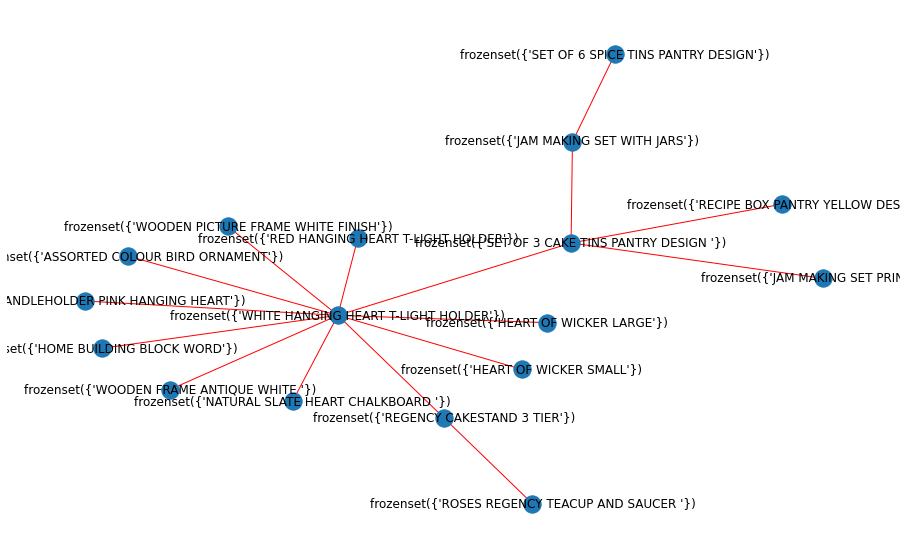

In [ ]:
import networkx as nx

fig, ax = plt.subplots(figsize=(16,10))

G = nx.from_pandas_edgelist(rule_lift_fil, source = 'antecedents', target = 'consequents')   
pos = nx.nx_agraph.graphviz_layout(G)

nx.draw(G, pos, with_labels=True, edge_color = 'r') 
plt.show()

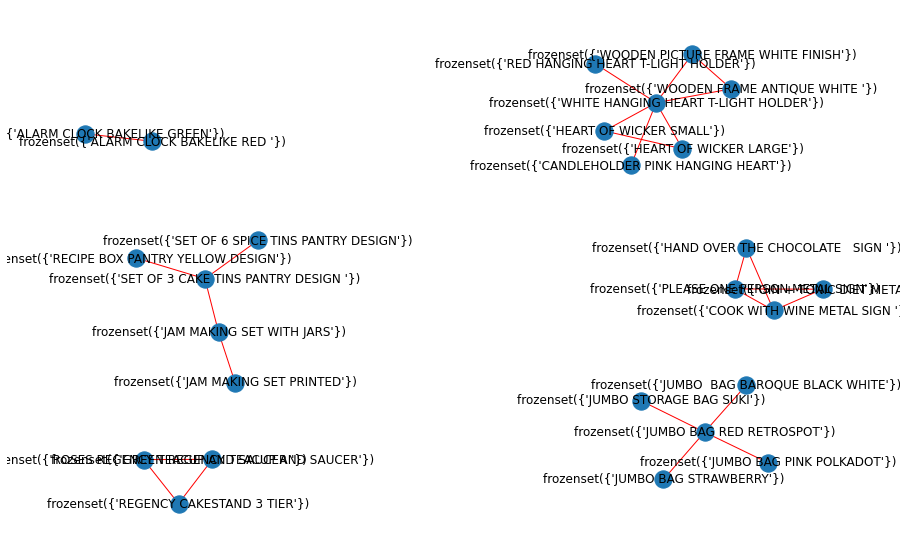

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))

G = nx.from_pandas_edgelist(rule_sup_fil, source = 'antecedents', target = 'consequents')   
pos = nx.nx_agraph.graphviz_layout(G)

nx.draw(G, pos, with_labels=True, edge_color = 'r') 
plt.show()